In [28]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
import seaborn as sns
import os.path

#initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

#twitter API Keys (load from untracked_api_key.txt)

with open('untracked_api_key_twitter.txt', 'r') as file_object:
    #Text document that is untracked in project-one directory (NOT pushed to git) with API key
    #Create a file called untracked_api_key.txt with your key and DO NOT add to git when commiting or pushing changes file_object.readline()
    consumer_key  = str(file_object.readline()).strip()
    consumer_secret = str(file_object.readline()).strip()
    access_token = str(file_object.readline()).strip()
    access_token_secret = str(file_object.readline()).strip()

#tweepy API authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [31]:
#twitter news account list
target_user_list = ["BBC", "CBS", "CNN", "foxnews","nytimes"]

# Counter
counter = 1

# Variables for holding sentiments
sentiments = []

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    # Get all tweets from home feed
    for user in target_user_list:
        public_tweets = api.user_timeline(target_user)

        # Loop through all tweets 
        for tweet in public_tweets:

            # Print Tweets
            # print("Tweet %s: %s" % (counter, tweet["text"]))

            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            tweets_ago = counter

            # Add sentiments for each tweet into an array
            sentiments.append({"Date": tweet["created_at"], 
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral": neg,
                               "Tweets Ago": counter})

            # Add to counter 
            counter = counter + 1


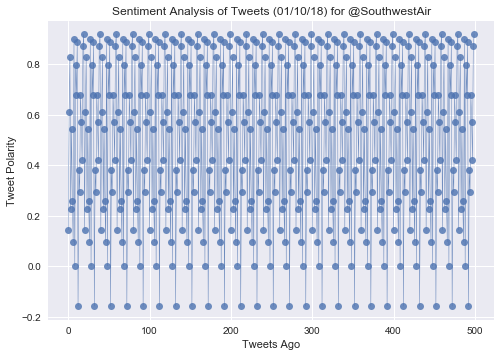

In [32]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd.head()# Create plot
plt.plot(np.arange(len(sentiments_pd["Compound"])),
         sentiments_pd["Compound"], marker="o", linewidth=0.5,
         alpha=0.8)

# # Incorporate the other graph properties
plt.title("Sentiment Analysis of Tweets (%s) for %s" % (time.strftime("%x"), target_user))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.show()